In [1]:
import pandas as pd 
import numpy as np
import math
import datetime
from datetime import date
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [3]:
data = pd.read_csv('SalaryData.csv')
data.head()

,SalaryDataID,CalendarYear,EmployeeName,Department,JobTitle,AnnualRate,RegularRate,OvertimeRate,IncentiveAllowance,Other,YearToDate
0,1,2010,"Watson, Stanley",Metro Corrections,Corrections Officer,43929.6,43919.04,1488.96,0.0,0.00,45408.00
1,2,2010,"Harris, Larry",Metro Corrections,Corrections Officer,40435.2,40901.76,4096.98,0.0,777.60,45776.34
2,3,2010,"Roth, Martin",Metro Corrections,Corrections Officer,43929.6,43266.09,221.76,0.0,0.00,43487.85
3,4,2010,"Crump, Joseph",Metro Corrections,Corrections Officer,43929.6,43633.92,2653.20,0.0,0.00,46287.12
4,5,2008,"Parr, Walter",Metro Corrections,Corrections Officer,39644.8,38826.68,2870.17,20.8,6.22,41723.87


In [4]:
data= data.drop(columns = ['SalaryDataID','EmployeeName','YearToDate','JobTitle'])
data.head()

,CalendarYear,Department,AnnualRate,RegularRate,OvertimeRate,IncentiveAllowance,Other
0,2010,Metro Corrections,43929.6,43919.04,1488.96,0.0,0.00
1,2010,Metro Corrections,40435.2,40901.76,4096.98,0.0,777.60
2,2010,Metro Corrections,43929.6,43266.09,221.76,0.0,0.00
3,2010,Metro Corrections,43929.6,43633.92,2653.20,0.0,0.00
4,2008,Metro Corrections,39644.8,38826.68,2870.17,20.8,6.22


In [5]:
data['IncentiveAllowance'] = data['IncentiveAllowance'].replace(0,data['IncentiveAllowance'].mode())
data['Other'] = data['Other'].replace(0,data['Other'].mode())

In [6]:
data.head()

,CalendarYear,Department,AnnualRate,RegularRate,OvertimeRate,IncentiveAllowance,Other
0,2010,Metro Corrections,43929.6,43919.04,1488.96,0.0,0.00
1,2010,Metro Corrections,40435.2,40901.76,4096.98,0.0,777.60
2,2010,Metro Corrections,43929.6,43266.09,221.76,0.0,0.00
3,2010,Metro Corrections,43929.6,43633.92,2653.20,0.0,0.00
4,2008,Metro Corrections,39644.8,38826.68,2870.17,20.8,6.22


In [7]:
data.describe()

,CalendarYear,AnnualRate,RegularRate,OvertimeRate,IncentiveAllowance,Other
count,99028.000000,99028.000000,99028.000000,99028.000000,99028.000000,99028.000000
mean,2014.270206,43000.219898,34073.805894,3676.481158,1859.266058,971.432717
std,3.983615,18355.225934,21745.492272,7137.482594,3267.240780,4256.380439
min,2008.000000,1300.000000,-542.100000,-282.600000,-207.150000,-28699.390000
25%,2011.000000,32822.400000,14923.390000,0.000000,0.000000,0.000000
50%,2014.000000,43014.400000,36054.400000,389.000000,0.000000,0.000000
75%,2018.000000,52499.200000,48244.625000,3337.952500,1362.920000,555.600000
max,2021.000000,216000.200000,184752.180000,129395.540000,33278.640000,92638.750000


In [8]:
label_encoder = preprocessing.LabelEncoder()
data['Department']= label_encoder.fit_transform(data['Department'])
data['Salary'] = data['RegularRate']+data['OvertimeRate']+data['IncentiveAllowance']+data['Other']
data

,CalendarYear,Department,AnnualRate,RegularRate,OvertimeRate,IncentiveAllowance,Other,Salary
0,2010,27,43929.6,43919.04,1488.96,0.0,0.00,45408.00
1,2010,27,40435.2,40901.76,4096.98,0.0,777.60,45776.34
2,2010,27,43929.6,43266.09,221.76,0.0,0.00,43487.85
3,2010,27,43929.6,43633.92,2653.20,0.0,0.00,46287.12
4,2008,27,39644.8,38826.68,2870.17,20.8,6.22,41723.87
...,...,...,...,...,...,...,...,...
99023,2015,27,39748.8,36147.10,14318.22,0.0,0.00,50465.32
99024,2015,27,40268.8,41033.52,4915.02,0.0,48.00,45996.54
99025,2015,22,40268.8,7040.46,1397.79,0.0,637.33,9075.58
99026,2015,27,39748.8,39436.63,3564.79,0.0,255.00,43256.42


In [9]:
dt = datetime.datetime.today()
data['TotalExperience'] = dt.year- data['CalendarYear']
data

,CalendarYear,Department,AnnualRate,RegularRate,OvertimeRate,IncentiveAllowance,Other,Salary,TotalExperience
0,2010,27,43929.6,43919.04,1488.96,0.0,0.00,45408.00,11
1,2010,27,40435.2,40901.76,4096.98,0.0,777.60,45776.34,11
2,2010,27,43929.6,43266.09,221.76,0.0,0.00,43487.85,11
3,2010,27,43929.6,43633.92,2653.20,0.0,0.00,46287.12,11
4,2008,27,39644.8,38826.68,2870.17,20.8,6.22,41723.87,13
...,...,...,...,...,...,...,...,...,...
99023,2015,27,39748.8,36147.10,14318.22,0.0,0.00,50465.32,6
99024,2015,27,40268.8,41033.52,4915.02,0.0,48.00,45996.54,6
99025,2015,22,40268.8,7040.46,1397.79,0.0,637.33,9075.58,6
99026,2015,27,39748.8,39436.63,3564.79,0.0,255.00,43256.42,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190746A5B20>,
      dtype=object)

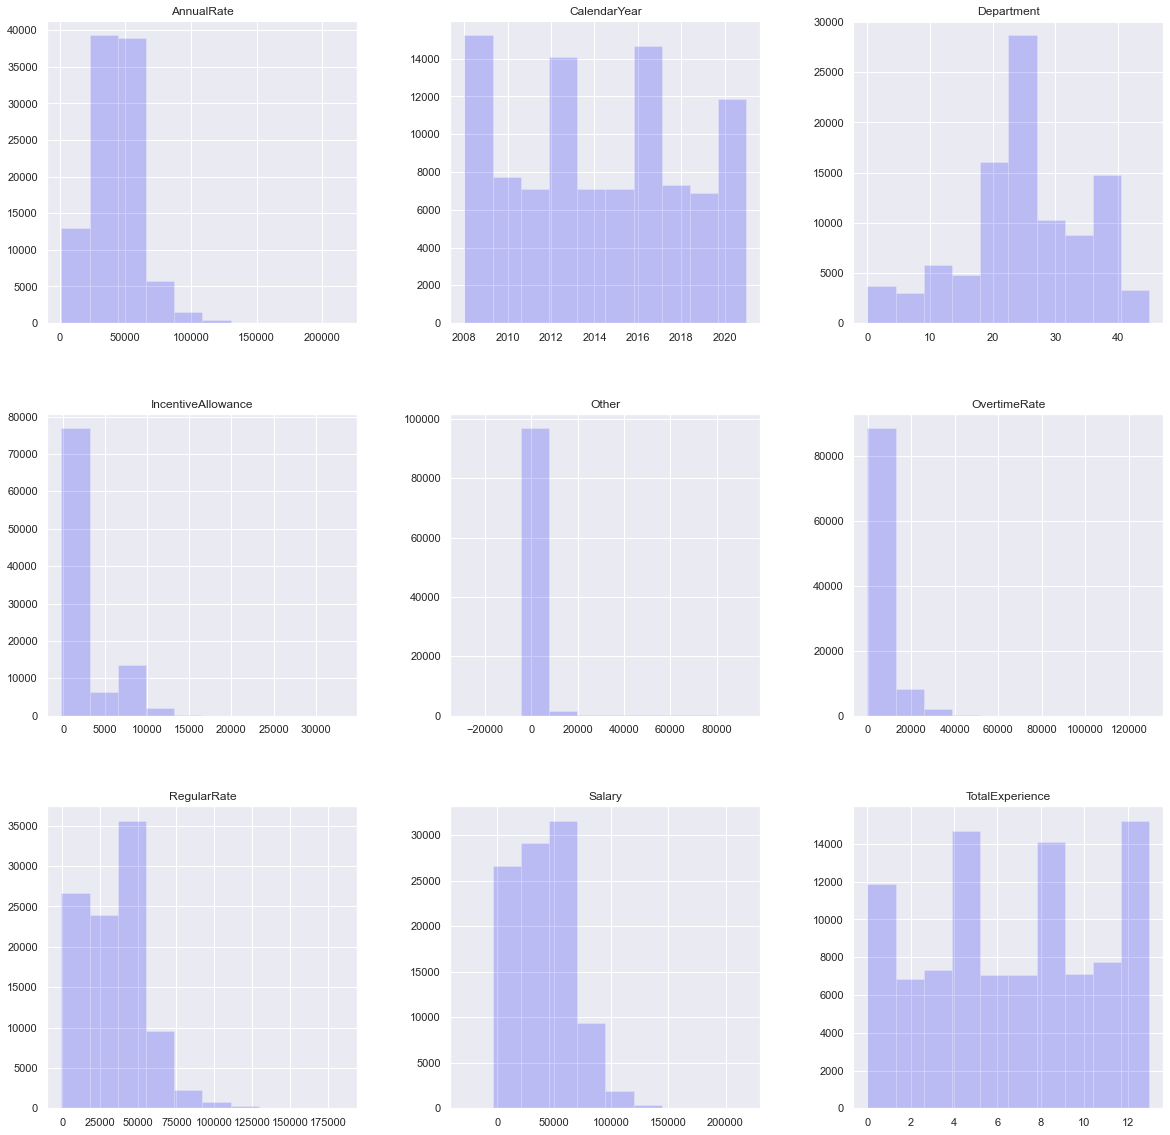

In [10]:
data.hist(color='blue',alpha=0.2,figsize=(20,20))

In [11]:
data.describe()

,CalendarYear,Department,AnnualRate,RegularRate,OvertimeRate,IncentiveAllowance,Other,Salary,TotalExperience
count,99028.000000,99028.000000,99028.000000,99028.000000,99028.000000,99028.000000,99028.000000,99028.000000,99028.000000
mean,2014.270206,24.654906,43000.219898,34073.805894,3676.481158,1859.266058,971.432717,40580.985827,6.729794
std,3.983615,9.611210,18355.225934,21745.492272,7137.482594,3267.240780,4256.380439,26454.224123,3.983615
min,2008.000000,0.000000,1300.000000,-542.100000,-282.600000,-207.150000,-28699.390000,-28699.390000,0.000000
25%,2011.000000,21.000000,32822.400000,14923.390000,0.000000,0.000000,0.000000,17090.235000,3.000000
50%,2014.000000,23.000000,43014.400000,36054.400000,389.000000,0.000000,0.000000,41523.020000,7.000000
75%,2018.000000,34.000000,52499.200000,48244.625000,3337.952500,1362.920000,555.600000,59009.397500,10.000000
max,2021.000000,45.000000,216000.200000,184752.180000,129395.540000,33278.640000,92638.750000,218157.880000,13.000000


In [12]:
y = data['Salary']
X = data[['TotalExperience','Department']]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


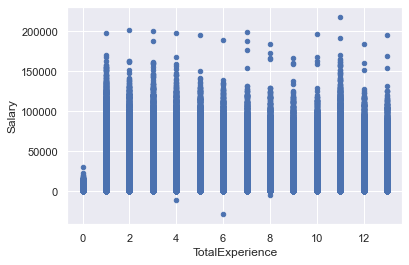

In [13]:
data.plot.scatter(x='TotalExperience',y='Salary')

In [14]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [16]:
y_train

44931     33516.21
79234      3857.61
15646     57796.43
91875     71474.43
65066     34665.60
           ...    
96511     46966.40
26675     55469.41
72995    130165.54
24053     64110.52
19074     63713.30
Name: Salary, Length: 74271, dtype: float64

In [17]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [18]:
regression.score(x_train,y_train)

0.003774689687759736

In [19]:
adj_r2(x_train,y_train)

0.0037478618396875607

In [20]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train) 

LassoCV(cv=10, max_iter=100000, normalize=True)

In [21]:
alpha = lasscv.alpha_
alpha

0.0058732430583700295

In [22]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0058732430583700295)

In [23]:
lasso_reg.score(x_test, y_test)

0.0040473564836359666

In [24]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([5.119794  , 4.75149659, 0.93329511, 0.2213309 , 1.77150984,
       0.31140714, 9.83903235, 7.16913625, 2.71733843, 7.58238552,
       1.16247277, 2.45417252, 4.8041425 , 4.91500338, 8.03206691,
       0.35135893, 3.84843606, 3.75896416, 1.69546201, 3.76166789,
       7.33141248, 0.95054343, 2.64442516, 2.80780515, 2.06407456,
       5.32152152, 1.50177912, 9.5075339 , 1.59792171, 5.78969425,
       6.44482587, 1.29027426, 7.57498817, 6.05474252, 5.38121371,
       0.66633333, 9.54295344, 8.00789451, 2.529527  , 6.53575105,
       1.10262443, 8.77519191, 7.54255406, 5.68242366, 3.76483603,
       7.8745309 , 9.40739201, 1.51337808, 8.57648339, 7.77164668]),
        cv=10, normalize=True)

In [25]:
ridgecv.alpha_

0.22133089607005774

In [26]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.22133089607005774)

In [27]:
ridge_model.score(x_test, y_test)

0.004047359366236458

In [28]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [29]:
elasticCV.alpha_

3.200500677448093

In [30]:
elasticCV.l1_ratio

0.5

In [31]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=3.200500677448093)

In [32]:
elasticnet_reg.score(x_test, y_test)

0.0024464947017761585

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001907789B3A0>,
      dtype=object)

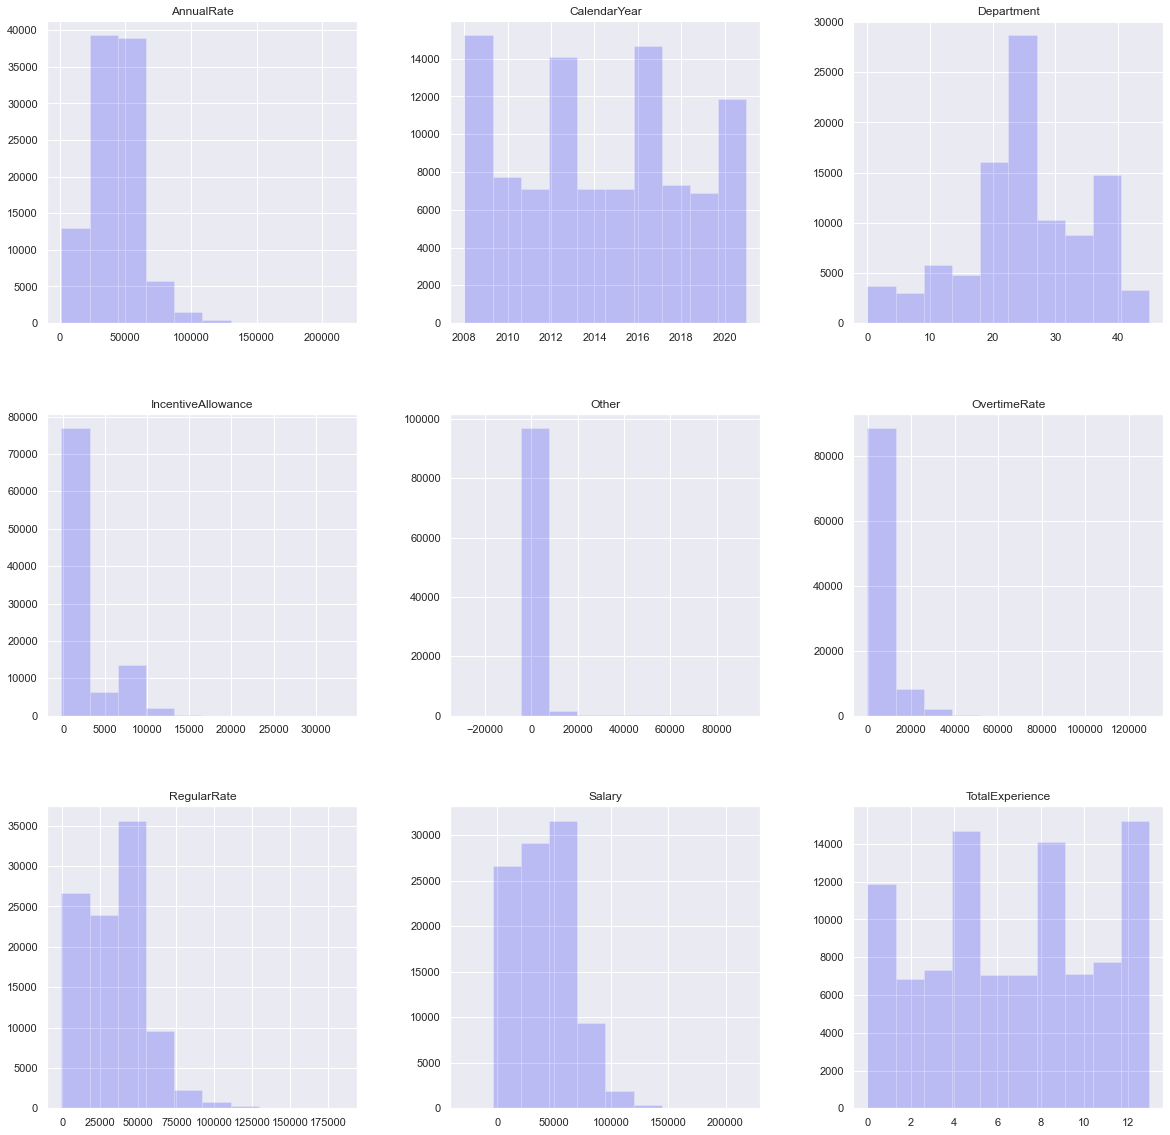

In [33]:
data.hist(color='blue',alpha=0.2,figsize=(20,20))